# STEP 1 

## DATA IMPORTING

In [7]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [11]:
# Load the Datasets
products = pd.read_csv("products_new.csv")

In [13]:
products

,product_id,title,category,description,price,avg_rating,review_count
0,B01LYEEFVH,Instant Pot DUO80 8 Qt 7-in-1,Kitchen,"7-in-1 pressure cooker, slow cooker, rice cook...",99.95,4.7,25430
1,B07PGL8355,Fire TV Stick 4K,Electronics,4K Ultra HD streaming device with Alexa Voice ...,49.99,4.6,98721
2,B07XKF5RM3,Echo Dot (4th Gen),Electronics,Smart speaker with Alexa | Glacier White,49.99,4.7,85642
3,B08N5KWB9H,Kindle Paperwhite,Books,"Waterproof, 8GB, 6.8\ display",149.95,4.8,43215
4,B08KTZCF4N,Apple AirPods Pro,Electronics,Active Noise Cancelling wireless earbuds,249.00,4.6,128753
...,...,...,...,...,...,...,...
995,SKU000946,Kindle Paperwhite,Books,"Waterproof, 8GB, 6.8\ display",135.28,4.9,22201
996,SKU000947,Nintendo Switch with Neon Joy-Con,Gaming,Console with Neon Blue and Neon Red Joy-Con co...,278.20,4.4,65598
997,SKU000948,Instant Pot DUO80 8 Qt 7-in-1,Kitchen,"7-in-1 pressure cooker, slow cooker, rice cook...",107.95,5.0,18167
998,SKU000949,Yeti Rambler 18 oz Bottle,Kitchen,Vacuum insulated stainless steel water bottle,32.23,4.7,2478


In [15]:
ratings = pd.read_csv("reviews_new.csv")

In [17]:
ratings

,user_id,product_id,rating,timestamp,review_id
0,A1B2C3D4E5F6G,B01LYEEFVH,5.0,2023-01-15 08:30:00,NaN
1,A1B2C3D4E5F6G,B07PGL8355,4.0,2023-01-16 09:45:00,NaN
2,A1B2C3D4E5F6G,B07XKF5RM3,5.0,2023-01-17 10:15:00,NaN
3,A1B2C3D4E5F6G,B08N5KWB9H,4.0,2023-01-18 11:30:00,NaN
4,H7I8J9K0L1M2N,B08KTZCF4N,3.0,2023-02-01 14:20:00,NaN
...,...,...,...,...,...
995,R1S2T3U4V5W6X,B08L8J1G3Q,4.1,2023-08-30 13:40:00,REV100911
996,H7I8J9K0L1M2N,B08J8FL9J2,4.1,2023-02-15 13:20:00,REV100912
997,K1L2M3N4O5P6Q,B08L8J1G3Y,4.8,2023-07-25 16:50:00,REV100913
998,T1U2V3W4X5Y6Z,B08L8J1G3Z,3.0,2023-12-10 16:20:00,REV100914


In [19]:
ratings.drop(["review_id"],axis=1,inplace=True)

### Basic Data Exploration

In [21]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    1000 non-null   object 
 1   title         1000 non-null   object 
 2   category      1000 non-null   object 
 3   description   1000 non-null   object 
 4   price         1000 non-null   float64
 5   avg_rating    1000 non-null   float64
 6   review_count  1000 non-null   int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [23]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_id     1000 non-null   object 
 1   product_id  1000 non-null   object 
 2   rating      1000 non-null   float64
 3   timestamp   1000 non-null   object 
dtypes: float64(1), object(3)
memory usage: 31.4+ KB


### Check for Missing values

In [25]:
products.isnull().sum()

product_id      0
title           0
category        0
description     0
price           0
avg_rating      0
review_count    0
dtype: int64

In [27]:
ratings.isnull().sum()

user_id       0
product_id    0
rating        0
timestamp     0
dtype: int64

### Filter to keep only products with sufficient reviews

In [29]:
product_review_counts = ratings["product_id"].value_counts()

In [31]:
product_review_counts 

product_id
B08L8J1G3W    39
B08K3Y2D5V    35
B08HRJV5FR    34
B08L8J1G3Y    31
B08F2T4L2I    31
B08HR5SXPS    29
B08N5K5D5U    29
B08HRJV5FP    27
B08K3Y2D5T    26
B08PDN2R3C    26
B08N5K5D5T    25
B08HRJV5FT    25
B08HRJV5FS    24
B08N5K5D5V    24
B08L3QCZZX    24
B08HRJV5FQ    24
B08F2T4L2H    24
B08L8J1G3Z    24
B08JQQ1VD1    24
B07W6ZQYJR    23
B08K3Y2D5X    23
B08L8J1G3X    23
B08K3Y2D5W    23
B07VGRJDFY    23
B08N5K5D5W    22
B08F2T4L2G    22
B08L8J1G3Q    21
B08F2T4L2J    20
B07K1J3C23    20
B08KTZCF4N    19
B08K3Y2D5U    18
B07R2W9D3X    17
B08F2T4L2K    16
B08K3S6WJS    16
B08L5WD9D6    14
B07T81554H    13
B07XKF5RM3    13
B08J8FL9J2    13
B01LYEEFVH    13
B08CX5JL4D    12
B08FC5L3RG    11
B08N5KWB9H    11
B08T4Y6HJX    10
B08N5LNQCX    10
B08BX7FV5L    10
B08F7H7J9V     9
B07PGL8355     9
B08N5K5D5S     8
B08G1Y9XNK     8
B08H95Y452     5
Name: count, dtype: int64

In [33]:
popular_products = product_review_counts[product_review_counts >= 10].index

In [35]:
popular_products 

Index(['B08L8J1G3W', 'B08K3Y2D5V', 'B08HRJV5FR', 'B08L8J1G3Y', 'B08F2T4L2I',
       'B08HR5SXPS', 'B08N5K5D5U', 'B08HRJV5FP', 'B08K3Y2D5T', 'B08PDN2R3C',
       'B08N5K5D5T', 'B08HRJV5FT', 'B08HRJV5FS', 'B08N5K5D5V', 'B08L3QCZZX',
       'B08HRJV5FQ', 'B08F2T4L2H', 'B08L8J1G3Z', 'B08JQQ1VD1', 'B07W6ZQYJR',
       'B08K3Y2D5X', 'B08L8J1G3X', 'B08K3Y2D5W', 'B07VGRJDFY', 'B08N5K5D5W',
       'B08F2T4L2G', 'B08L8J1G3Q', 'B08F2T4L2J', 'B07K1J3C23', 'B08KTZCF4N',
       'B08K3Y2D5U', 'B07R2W9D3X', 'B08F2T4L2K', 'B08K3S6WJS', 'B08L5WD9D6',
       'B07T81554H', 'B07XKF5RM3', 'B08J8FL9J2', 'B01LYEEFVH', 'B08CX5JL4D',
       'B08FC5L3RG', 'B08N5KWB9H', 'B08T4Y6HJX', 'B08N5LNQCX', 'B08BX7FV5L'],
      dtype='object', name='product_id')

In [37]:
products = products[products["product_id"].isin(popular_products)]

In [39]:
products

,product_id,title,category,description,price,avg_rating,review_count
0,B01LYEEFVH,Instant Pot DUO80 8 Qt 7-in-1,Kitchen,"7-in-1 pressure cooker, slow cooker, rice cook...",99.95,4.7,25430
2,B07XKF5RM3,Echo Dot (4th Gen),Electronics,Smart speaker with Alexa | Glacier White,49.99,4.7,85642
3,B08N5KWB9H,Kindle Paperwhite,Books,"Waterproof, 8GB, 6.8\ display",149.95,4.8,43215
4,B08KTZCF4N,Apple AirPods Pro,Electronics,Active Noise Cancelling wireless earbuds,249.00,4.6,128753
5,B07W6ZQYJR,LEGO Ideas Tree House,Toys,3036-piece building kit with 3 cabins and foli...,249.99,4.9,5421
7,B08J8FL9J2,PlayStation 5 Digital Edition,Gaming,"Ultra-high speed SSD, 4K UHD Blu-ray drive",399.99,4.9,65432
8,B08FC5L3RG,Xbox Series S,Gaming,Next-gen console with 512GB SSD,299.99,4.7,54321
9,B07VGRJDFY,Apple Watch Series 6,Electronics,"GPS, 44mm Space Gray Aluminum Case with Black ...",429.00,4.8,76543
10,B08L5WD9D6,"Samsung 55\"" QLED TV",Electronics,4K Smart TV with Quantum HDR and Alexa Built-in,697.99,4.7,32145
11,B08BX7FV5L,Yeti Rambler 20 oz Tumbler,Kitchen,Vacuum insulated stainless steel tumbler with ...,29.99,4.8,87654


In [41]:
ratings = ratings[ratings["product_id"].isin(popular_products)]

In [43]:
ratings

,user_id,product_id,rating,timestamp
0,A1B2C3D4E5F6G,B01LYEEFVH,5.0,2023-01-15 08:30:00
2,A1B2C3D4E5F6G,B07XKF5RM3,5.0,2023-01-17 10:15:00
3,A1B2C3D4E5F6G,B08N5KWB9H,4.0,2023-01-18 11:30:00
4,H7I8J9K0L1M2N,B08KTZCF4N,3.0,2023-02-01 14:20:00
5,H7I8J9K0L1M2N,B07W6ZQYJR,4.0,2023-02-05 11:10:00
...,...,...,...,...
995,R1S2T3U4V5W6X,B08L8J1G3Q,4.1,2023-08-30 13:40:00
996,H7I8J9K0L1M2N,B08J8FL9J2,4.1,2023-02-15 13:20:00
997,K1L2M3N4O5P6Q,B08L8J1G3Y,4.8,2023-07-25 16:50:00
998,T1U2V3W4X5Y6Z,B08L8J1G3Z,3.0,2023-12-10 16:20:00


### Merge product info with reviews

In [45]:
data = pd.merge(ratings, products, on = "product_id")

In [47]:
data 

,user_id,product_id,rating,timestamp,title,category,description,price,avg_rating,review_count
0,A1B2C3D4E5F6G,B01LYEEFVH,5.0,2023-01-15 08:30:00,Instant Pot DUO80 8 Qt 7-in-1,Kitchen,"7-in-1 pressure cooker, slow cooker, rice cook...",99.95,4.7,25430
1,A1B2C3D4E5F6G,B07XKF5RM3,5.0,2023-01-17 10:15:00,Echo Dot (4th Gen),Electronics,Smart speaker with Alexa | Glacier White,49.99,4.7,85642
2,A1B2C3D4E5F6G,B08N5KWB9H,4.0,2023-01-18 11:30:00,Kindle Paperwhite,Books,"Waterproof, 8GB, 6.8\ display",149.95,4.8,43215
3,H7I8J9K0L1M2N,B08KTZCF4N,3.0,2023-02-01 14:20:00,Apple AirPods Pro,Electronics,Active Noise Cancelling wireless earbuds,249.00,4.6,128753
4,H7I8J9K0L1M2N,B07W6ZQYJR,4.0,2023-02-05 11:10:00,LEGO Ideas Tree House,Toys,3036-piece building kit with 3 cabins and foli...,249.99,4.9,5421
...,...,...,...,...,...,...,...,...,...,...
956,R1S2T3U4V5W6X,B08L8J1G3Q,4.1,2023-08-30 13:40:00,Amazon Smart Plug,Electronics,Wi-Fi enabled plug that works with Alexa,24.99,4.5,7654
957,H7I8J9K0L1M2N,B08J8FL9J2,4.1,2023-02-15 13:20:00,PlayStation 5 Digital Edition,Gaming,"Ultra-high speed SSD, 4K UHD Blu-ray drive",399.99,4.9,65432
958,K1L2M3N4O5P6Q,B08L8J1G3Y,4.8,2023-07-25 16:50:00,AmazonBasics Memory Foam Mattress,Home,8-inch medium-firm memory foam mattress,189.99,4.5,4321
959,T1U2V3W4X5Y6Z,B08L8J1G3Z,3.0,2023-12-10 16:20:00,AmazonBasics Security Safe,Home,0.5 cubic foot electronic safe with keys,49.99,4.4,5432


# STEP 2

## Exploratory Data Analysis (EDA)

#### Distribution of ratings

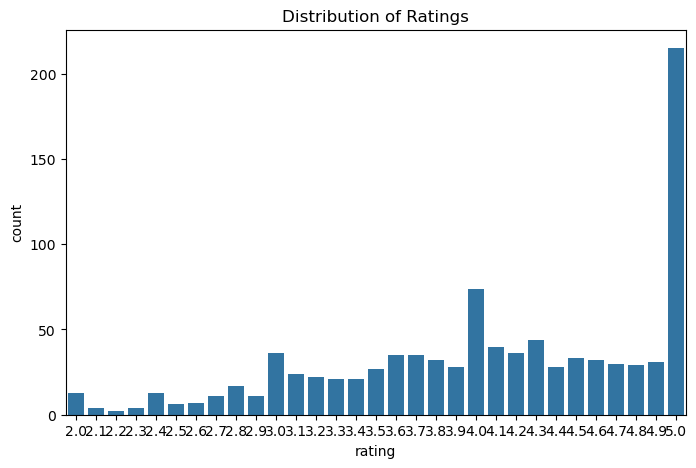

In [49]:
plt.figure(figsize = (8,5))
sns.countplot(x = "rating", data = data)
plt.title("Distribution of Ratings")
plt.show()

#### Top reviewed products

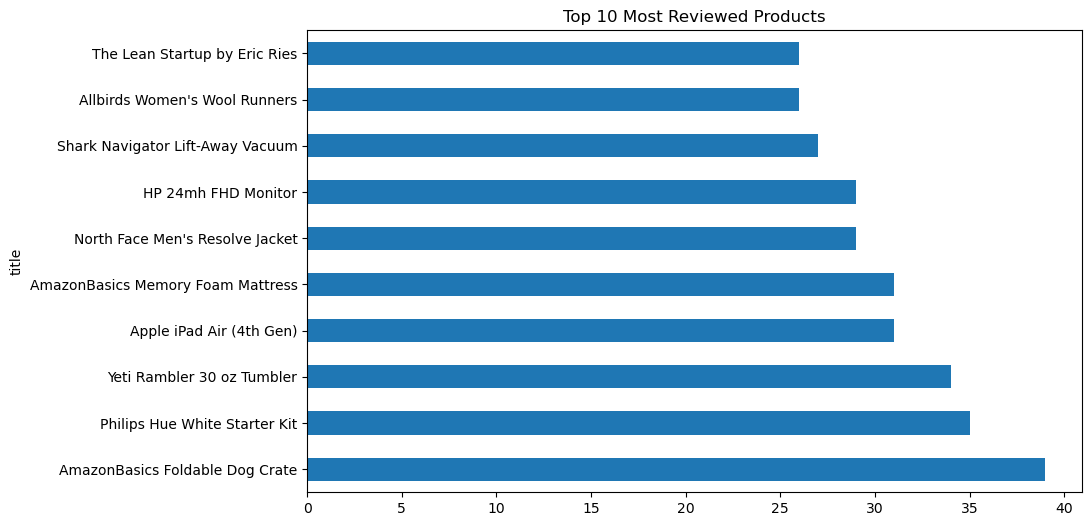

In [51]:
top_products = data["title"].value_counts().head(10)
plt.figure(figsize=(10,6))
top_products.plot(kind='barh')
plt.title("Top 10 Most Reviewed Products")
plt.show()

# STEP 3

## Recommendation System Approaches

#### 1. Popularity-Based Recommendation

In [53]:
def popularity_based_recommendations(n=5):
    # Get products with highest average rating and sufficient reviews
    product_stats = ratings.groupby("product_id").agg(new_avg_ratings=("rating","mean"),num_ratings=("rating","count")).reset_index()
    # Filter products with sufficient reviews
    product_stats = product_stats[product_stats["num_ratings"] >= 10]
    # Merge with product details
    merged = pd.merge(product_stats,products,on="product_id")
    # calculate weighted score
    merged["score"] = merged["new_avg_ratings"]*np.log(merged["num_ratings"])
    return merged.sort_values("score",ascending=False).head(n)

# Example usage
popular_recs = popularity_based_recommendations(5)
print("Popular Products:")
display(popular_recs[["product_id","title","new_avg_ratings","num_ratings"]])

Popular Products:


,product_id,title,new_avg_ratings,num_ratings
26,B08K3Y2D5V,Philips Hue White Starter Kit,4.468571,35
27,B08K3Y2D5W,GoPro HERO9 Black,4.960870,23
18,B08HRJV5FR,Yeti Rambler 30 oz Tumbler,4.329412,34
28,B08K3Y2D5X,Patagonia Men's Better Sweater,4.839130,23
37,B08N5K5D5T,KitchenAid Artisan Stand Mixer,4.696000,25


#### 2. Content-Based Recommendation

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [57]:
def content_based_recommendations(product_id,n=5):
    # find similar products based on description
    tfidf = TfidfVectorizer(stop_words = "english")
    tfidf_matrix = tfidf.fit_transform(products["description"])

    cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
    idx = products.index[products["product_id"] == product_id].tolist()[0]

    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key = lambda x:x[1],reverse = True)
    product_indices = [i[0] for i in sim_scores[1:n+1]]

    return products.iloc[product_indices]

# Example Usage
content_recs = content_based_recommendations("B01LYEEFVH",3)
print("\n Products similar to B01LYEEFVH:")
display(content_recs[["product_id","title","category"]])


 Products similar to B01LYEEFVH:


,product_id,title,category
2,B07XKF5RM3,Echo Dot (4th Gen),Electronics
3,B08N5KWB9H,Kindle Paperwhite,Books
4,B08KTZCF4N,Apple AirPods Pro,Electronics


#### 3. Collaborative Filtering with Surprise

In [7]:
!pip install surprise

  Using cached surprise-0.1-py2.py3-none-any.whl.metadata (327 bytes)
  Using cached scikit_surprise-1.1.4-cp312-cp312-win_amd64.whl
Using cached surprise-0.1-py2.py3-none-any.whl (1.8 kB)


In [59]:
from surprise import Dataset, Reader, KNNBasic
from sklearn.model_selection import train_test_split

In [61]:
def collaborative_filtering_recommendations(user_id,n=5):
    # Recommend products based on user similarity
    reader = Reader(rating_scale=(1,5))
    data = Dataset.load_from_df(ratings[["user_id","product_id","rating"]],reader)
    trainset = data.build_full_trainset()

    algo = KNNBasic(sim_options={"name":"cosine","user_based":True})
    algo.fit(trainset)

    # Get unrated products
    rated_products = ratings[ratings["user_id"]==user_id]["product_id"].unique()
    all_products = products["product_id"].unique()
    unrated = np.setdiff1d(all_products, rated_products)

    # predict ratings
    predictions = [algo.predict(user_id,pid) for pid in unrated]
    predictions.sort(key=lambda x: x.est, reverse=True)

    top_products = [pred.iid for pred in predictions[:n]]
    return products[products["product_id"].isin(top_products)]
                                  
# Example usage
collab_recs = collaborative_filtering_recommendations("B01LYEEFVH",3)
print("\nRecommended for user B01LYEEFVH : ")
display(collab_recs[["product_id","title","category"]])

Computing the cosine similarity matrix...
Done computing similarity matrix.

Recommended for user B01LYEEFVH : 


,product_id,title,category
0,B01LYEEFVH,Instant Pot DUO80 8 Qt 7-in-1,Kitchen
12,B07R2W9D3X,All-new Blink Mini,Electronics
13,B07K1J3C23,Anker PowerCore 10000,Electronics


#### 4. Hybrid Recommendation System

In [63]:
def hybrid_recommendations(user_id, product_id, n=5):
    # combine collaborative and content-based filtering
    #content-based
    content_recs = content_based_recommendations(product_id,n//2)

    # Collaborative
    if user_id in ratings["user_id"].unique():
        collab_recs = collaborative_filtering_recommendations(user_id,n//2)
    else:
        collab_recs = popularity_based_recommendations(n//2)

    # combine and deduplicate
    hybrid = pd.concat([content_recs,collab_recs]).drop_duplicates("product_id")
    return hybrid.head(n)

# Example usage
hybrid_recs = hybrid_recommendations("B01LYEEFVH","B08L8J1G3Q",4)
print("\nHybrid Recommendations: ")
display(hybrid_recs[["product_id","title","category"]])


Hybrid Recommendations: 


,product_id,title,category
40,B08N5K5D5V,Calphalon Premier Space Saving Set,Kitchen
39,B08F2T4L2I,Apple iPad Air (4th Gen),Electronics
26,B08K3Y2D5V,Philips Hue White Starter Kit,Electronics
27,B08K3Y2D5W,GoPro HERO9 Black,Electronics


## STEP: 4

In [65]:
from surprise import Dataset, Reader, KNNBasic, accuracy
from surprise.model_selection import cross_validate, train_test_split

def evaluate_model():
    """Evaluate collaborative filtering model"""
    reader = Reader(rating_scale=(1, 5))
    data = Dataset.load_from_df(ratings[['user_id', 'product_id', 'rating']], reader)
    
    algo = KNNBasic(sim_options={'name': 'cosine', 'user_based': True})
    
    # Cross-validation
    results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
    
    # Train-test split (using Surprise's method, not sklearn)
    trainset, testset = train_test_split(data, test_size=0.25)
    predictions = algo.fit(trainset).test(testset)
    accuracy.rmse(predictions)
    
    return results

# Run evaluation
evaluation_results = evaluate_model()

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.6267  0.5686  0.5976  0.5997  0.5868  0.5959  0.0189  
MAE (testset)     0.4984  0.4543  0.4833  0.4583  0.4429  0.4674  0.0203  
Fit time          0.00    0.00    0.00    0.00    0.00    0.00    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.6101


In [3]:
import pandas as pd
import numpy as np

Evaluation Metrics:
Accuracy: 0.7772020725388601
Precision: 0.7795275590551181
Recall: 0.868421052631579
F1 Score: 0.8215767634854771


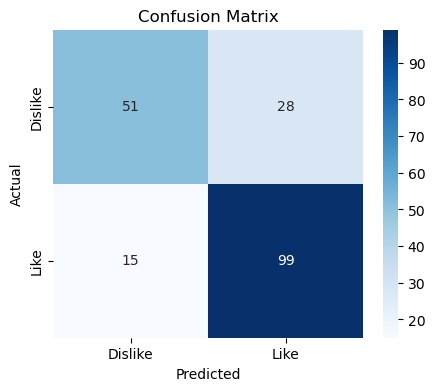

In [67]:
# Step 1: Prepare a classification target: whether a user liked the product (rating >= 4)
data = pd.merge(ratings, products, on='product_id')
data['liked'] = data['rating'] >= 4

# Step 2: Select relevant features
features = ['category', 'price', 'user_id', 'product_id']
df_model = data[features + ['liked']].copy()

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

le_user = LabelEncoder()
le_product = LabelEncoder()
le_category = LabelEncoder()

df_model['user_id'] = le_user.fit_transform(df_model['user_id'])
df_model['product_id'] = le_product.fit_transform(df_model['product_id'])
df_model['category'] = le_category.fit_transform(df_model['category'])

# Step 3: Train-test split
from sklearn.model_selection import train_test_split

X = df_model.drop('liked', axis=1)
y = df_model['liked']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train a classifier (Random Forest)
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Step 5: Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("Evaluation Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Dislike','Like'], yticklabels=['Dislike','Like'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
